### Bechmark Function Optimisation using 
# Particle Swarm Optimisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

## Objective Functions

In [15]:
def rastringin_function(X):
    A = 10
    y = A*2 + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])
    return y
def himmelblaus_function(X):
    y=(X[0]**2+X[1]-11)**2+(X[0]+X[1]**2-7)**2
    return y
def beale_function(X):
    y=(1.5-X[0]+X[0]*X[1])**2+(2.25-X[0]+X[0]*(X[1]**2))**2+(2.625-X[0]+X[0]*(X[1]**3))**2
    return y
def Booth_function(X):
    y=(X[0]+(2*X[1])-7)**2+((2*X[0])+X[1]-5)**2
    return y

bounds=[(-5.12,5.12),(-5.12,5,12)]
nv=2

particle_size=50
iterations=100
w=0.75
c1=1
c2=2

## Algorithm

In [16]:
class particle:
    def __init__(self,bounds):
        self.particle_position=[]
        self.particle_velocity=[]
        self.local_best_particle_position=[]
        self.fitness_local_best_particle_position = initial_fitness 
        self.fitness_particle_position = initial_fitness

        for i in range(nv):
            self.particle_position.append(random.uniform(bounds[i][0],bounds[i][1]))
            self.particle_velocity.append(random.uniform(-1,1))

    def evaluate_objective_function(self,objective_function):
        self.fitness_particle_position=objective_function(self.particle_position)
        if self.fitness_particle_position<self.fitness_local_best_particle_position:
            self.local_best_particle_position=self.particle_position
            self.fitness_local_best_particle_position=self.fitness_particle_position
    def update_velocity(self,global_best_particle_position):
        for i in range(nv):
            r1=random.random()
            r2=random.random()
            cognitive_velocity=c1*r1*(self.local_best_particle_position[i]-self.particle_position[i])
            social_velocity=c2*r2*(global_best_particle_position[i]-self.particle_position[i])
            self.particle_velocity[i]=w*self.particle_velocity[i]+cognitive_velocity+social_velocity

    def update_position(self,bounds):
        for i in range(nv):
            self.particle_position[i]=self.particle_position[i]+self.particle_velocity[i]
            if self.particle_position[i]>bounds[i][1]:
                self.particle_position[i]=bounds[i][1]
            if self.particle_position[i]<bounds[i][0]:
                self.particle_position[i]=bounds[i][0]


## Deployment

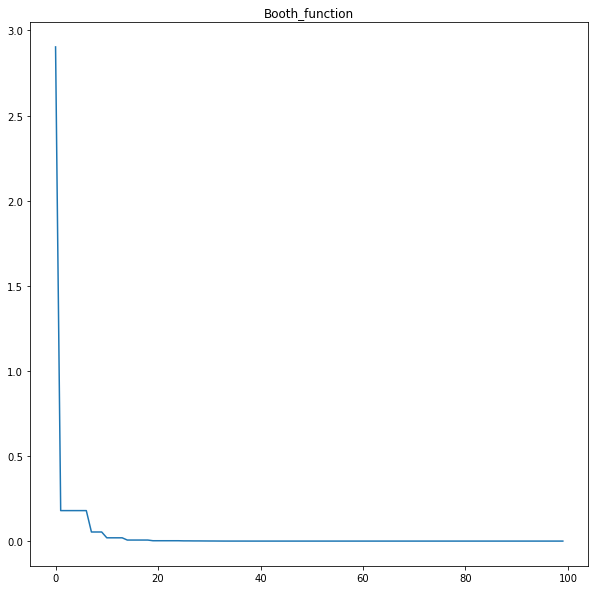

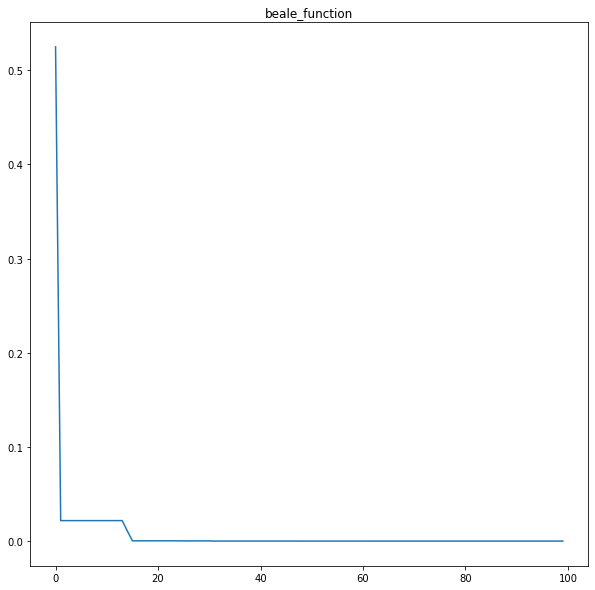

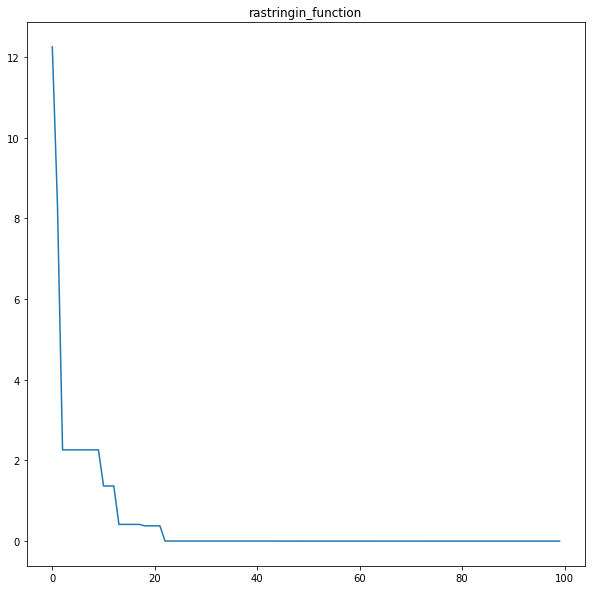

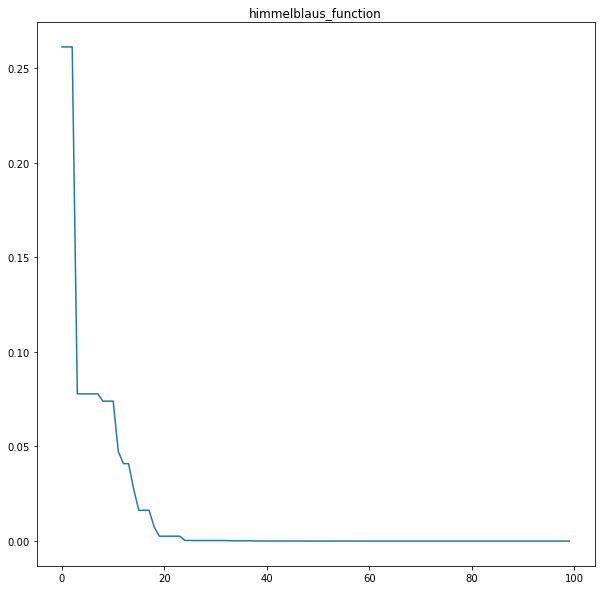

In [27]:

A=[[],[],[],[]]
k=0
for func in [Booth_function,beale_function,rastringin_function,himmelblaus_function]:
    initial_fitness=float('inf')
    fitness_global_best_particle_position=initial_fitness
    global_best_particle_position=[]
    swarm_particle=[]
    for _ in range(particle_size):
        swarm_particle.append(particle(bounds))
    for i in range(iterations):
        for j in range(particle_size):
            swarm_particle[j].evaluate_objective_function(func)
            if swarm_particle[j].fitness_particle_position<fitness_global_best_particle_position:
                global_best_particle_position=list(swarm_particle[j].particle_position)
                fitness_global_best_particle_position=float(swarm_particle[j].fitness_particle_position)
        for j in range(particle_size):
            swarm_particle[j].update_velocity(global_best_particle_position)
            swarm_particle[j].update_position(bounds)
        A[k].append(fitness_global_best_particle_position)
    
    plt.figure(figsize=(10,10))
    plt.plot(range(iterations),A[k])
    plt.title(func.__name__)
    k+=1
    